Question 1: Explain the concept of forward propagation in a neural network.

In [6]:
#Answer

Forward propagation is the process where input data passes through the network layer by layer, undergoing transformations through weights, biases, and activation functions to produce an output. It is the first phase in training a neural network.

Each layer in a neural network applies a linear transformation (Z = W * X + B), followed by an activation function (like ReLU or Sigmoid) to introduce non-linearity.

In [17]:
import numpy as np

def forward_propagation(X, W, B, activation_function):
    Z = np.dot(W, X) + B  # Linear transformation
    A = activation_function(Z)  # Apply activation function
    return A

# Example data
X = np.array([[0.5], [0.2]])  # Input (2 features)
W = np.array([[0.8, 0.4]])  # Weights
B = np.array([[0.1]])  # Bias

# Activation function (ReLU)
relu = lambda z: np.maximum(0, z)

output = forward_propagation(X, W, B, relu)
print("Forward Propagation Output:", output)


Forward Propagation Output: [[0.58]]


Question 2: What is the purpose of the activation function in forward propagation?

In [8]:
#Answer

The activation function introduces non-linearity into the network, allowing it to learn complex patterns and relationships in the data. Without activation functions, the entire network behaves as a linear model. Common activation functions include:

ReLU (Rectified Linear Unit): f(x) = max(0, x) (prevents vanishing gradient)

Sigmoid: f(x) = 1 / (1 + e^(-x)) (used for probabilities)

Tanh: f(x) = (e^x - e^(-x)) / (e^x + e^(-x)) (outputs between -1 and 1)

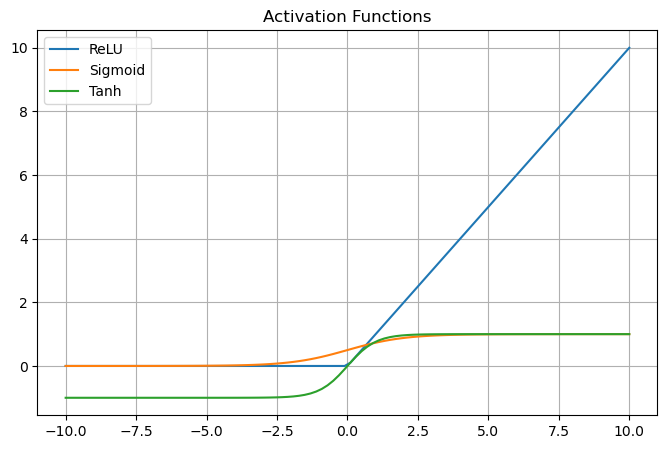

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Activation functions
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, relu, label="ReLU")
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.grid()
plt.show()


Question 3: Describe the steps involved in the backward propagation (backpropagation) algorithm.

In [10]:
#Answer

Backpropagation is the algorithm used to train neural networks by minimizing the loss function through gradient descent. The steps involved are:

Forward Pass: Compute the output of the network.
    
Compute Loss: Compare the output with the actual target value.

Compute Gradients: Use the chain rule to compute the gradients of weights and biases.

Update Weights: Adjust weights and biases using gradient descent.

In [23]:
def backward_propagation(X, Y, W, B, A, learning_rate=0.01):
    m = X.shape[1]  # Number of samples
    dZ = A - Y  # Derivative of loss w.r.t. activation
    dW = (1/m) * np.dot(dZ, X.T)  # Gradient of weights
    dB = (1/m) * np.sum(dZ, axis=1, keepdims=True)  # Gradient of bias

    # Update parameters
    W -= learning_rate * dW
    B -= learning_rate * dB

    return W, B

# Example data
Y = np.array([[1]])  # Actual label
W_new, B_new = backward_propagation(X, Y, W, B, output)
print("Updated Weights:", W_new)
print("Updated Bias:", B_new)


Updated Weights: [[0.8021  0.40084]]
Updated Bias: [[0.1042]]


Question 4: What is the purpose of the chain rule in backpropagation?

In [12]:
#Answer

The chain rule allows us to compute the derivative of complex functions by breaking them down into smaller parts. In backpropagation, it is used to compute how changes in weights affect the final loss function.

Mathematically, if L is the loss function and A is the output of an activation function:

𝑑
𝐿
𝑑
𝑊
=
𝑑
𝐿
𝑑
𝐴
⋅
𝑑
𝐴
𝑑
𝑍
⋅
𝑑
𝑍
𝑑
𝑊
dW
dL
​
 = 
dA
dL
​
 ⋅ 
dZ
dA
​
 ⋅ 
dW
dZ
​
 
This allows efficient computation of gradients through multiple layers.



Question 5: Implement the forward propagation process for a simple neural network with one hidden layer using NumPy.

In [14]:
#Answer

Below is a neural network with one hidden layer (2 input neurons, 2 hidden neurons, and 1 output neuron).

In [27]:
# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward propagation
def forward_propagation_nn(X, W1, B1, W2, B2):
    # Hidden layer
    Z1 = np.dot(W1, X) + B1
    A1 = sigmoid(Z1)

    # Output layer
    Z2 = np.dot(W2, A1) + B2
    A2 = sigmoid(Z2)

    return A2

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(2, 2)
B1 = np.random.randn(2, 1)
W2 = np.random.randn(1, 2)
B2 = np.random.randn(1, 1)

# Example input
X = np.array([[0.5], [0.3]])

# Compute output
output_nn = forward_propagation_nn(X, W1, B1, W2, B2)
print("Neural Network Output:", output_nn)


Neural Network Output: [[0.68899374]]
